# Exploratory Data Analysis



In [2]:
!pip install shap
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=00ee365969135f9c2bdbe0edca3378725b5d058c326b28db077c14e2e8e0b66a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstallin

In [3]:
# libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p

from matplotlib import pyplot as plt
import seaborn as sns
import seaborn as sn

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# connect to data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import data
df_path = '/content/drive/MyDrive/CapstoneProject/ryanair_clean_datasets/train_extended.csv'
df = pd.read_csv(df_path)

In [6]:
df['Burnoff'].mean()

4629.091397947823

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765236 entries, 0 to 765235
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FlightID               765236 non-null  int64  
 1   FlightNumber           765236 non-null  int64  
 2   AircraftRegistration   765236 non-null  object 
 3   AircraftCapacity       765236 non-null  float64
 4   AircraftTypeGroup      765236 non-null  object 
 5   ServiceDescription     765236 non-null  object 
 6   Carrier                765236 non-null  object 
 7   AOCDescription         765236 non-null  object 
 8   ScheduledRoute         765236 non-null  object 
 9   ActualRoute            765236 non-null  object 
 10  DepartureScheduled     765236 non-null  object 
 11  ArrivalScheduled       765236 non-null  object 
 12  DepartureActual        765236 non-null  object 
 13  ArrivalActual          765236 non-null  object 
 14  BlockTimeScheduled     765236 non-nu

In [ ]:
df.describe()

,FlightID,FlightNumber,AircraftCapacity,BlockTimeScheduled,BlockTime,TaxiOut,Burnoff,Adults,Children,Freight,Infants,Bags,FlightTime,PlannedZeroFuelWeight,PlannedTOW,PlannedTripTime,TeledyneRampWeight
count,7.652360e+05,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,7.652360e+05,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000,765236.000000
mean,1.803912e+08,4833.568776,188.921150,134.947450,129.532608,10.748238,4629.091398,123.432800,6.848364,4.097589e+01,1.141368,36.901058,113.652191,55705.791909,63305.745196,7129.109134,61993.305010
std,9.532071e+05,2872.103795,2.192957,48.777121,49.641231,4.248450,1939.463599,43.201878,7.044763,2.543987e+04,1.434320,24.517012,49.599594,3401.422155,4258.225029,2950.331603,5666.540433
min,1.787714e+08,8.000000,148.000000,25.000000,9.000000,0.000000,-3970.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,41716.000000,45088.000000,723.000000,360.000000
25%,1.797277e+08,2294.000000,189.000000,95.000000,91.000000,8.000000,3160.000000,95.000000,2.000000,0.000000e+00,0.000000,20.000000,76.000000,53923.000000,61027.000000,4885.000000,58846.000000
50%,1.807732e+08,4787.000000,189.000000,130.000000,125.000000,10.000000,4370.000000,136.000000,5.000000,0.000000e+00,1.000000,32.000000,108.000000,56978.000000,63822.000000,6834.000000,62437.000000
75%,1.811498e+08,7249.000000,189.000000,165.000000,158.000000,12.000000,5730.000000,159.000000,9.000000,0.000000e+00,2.000000,49.000000,142.000000,58128.000000,66097.000000,8827.000000,65104.000000
max,1.831321e+08,9999.000000,197.000000,355.000000,1688.000000,137.000000,15810.000000,212.000000,139.000000,2.223333e+07,40.000000,1170.000000,1678.000000,63781.000000,77990.000000,23105.000000,163800.000000


In [ ]:
profile = ProfileReport(df)
profile

Output hidden; open in https://colab.research.google.com to view.

## Correlation

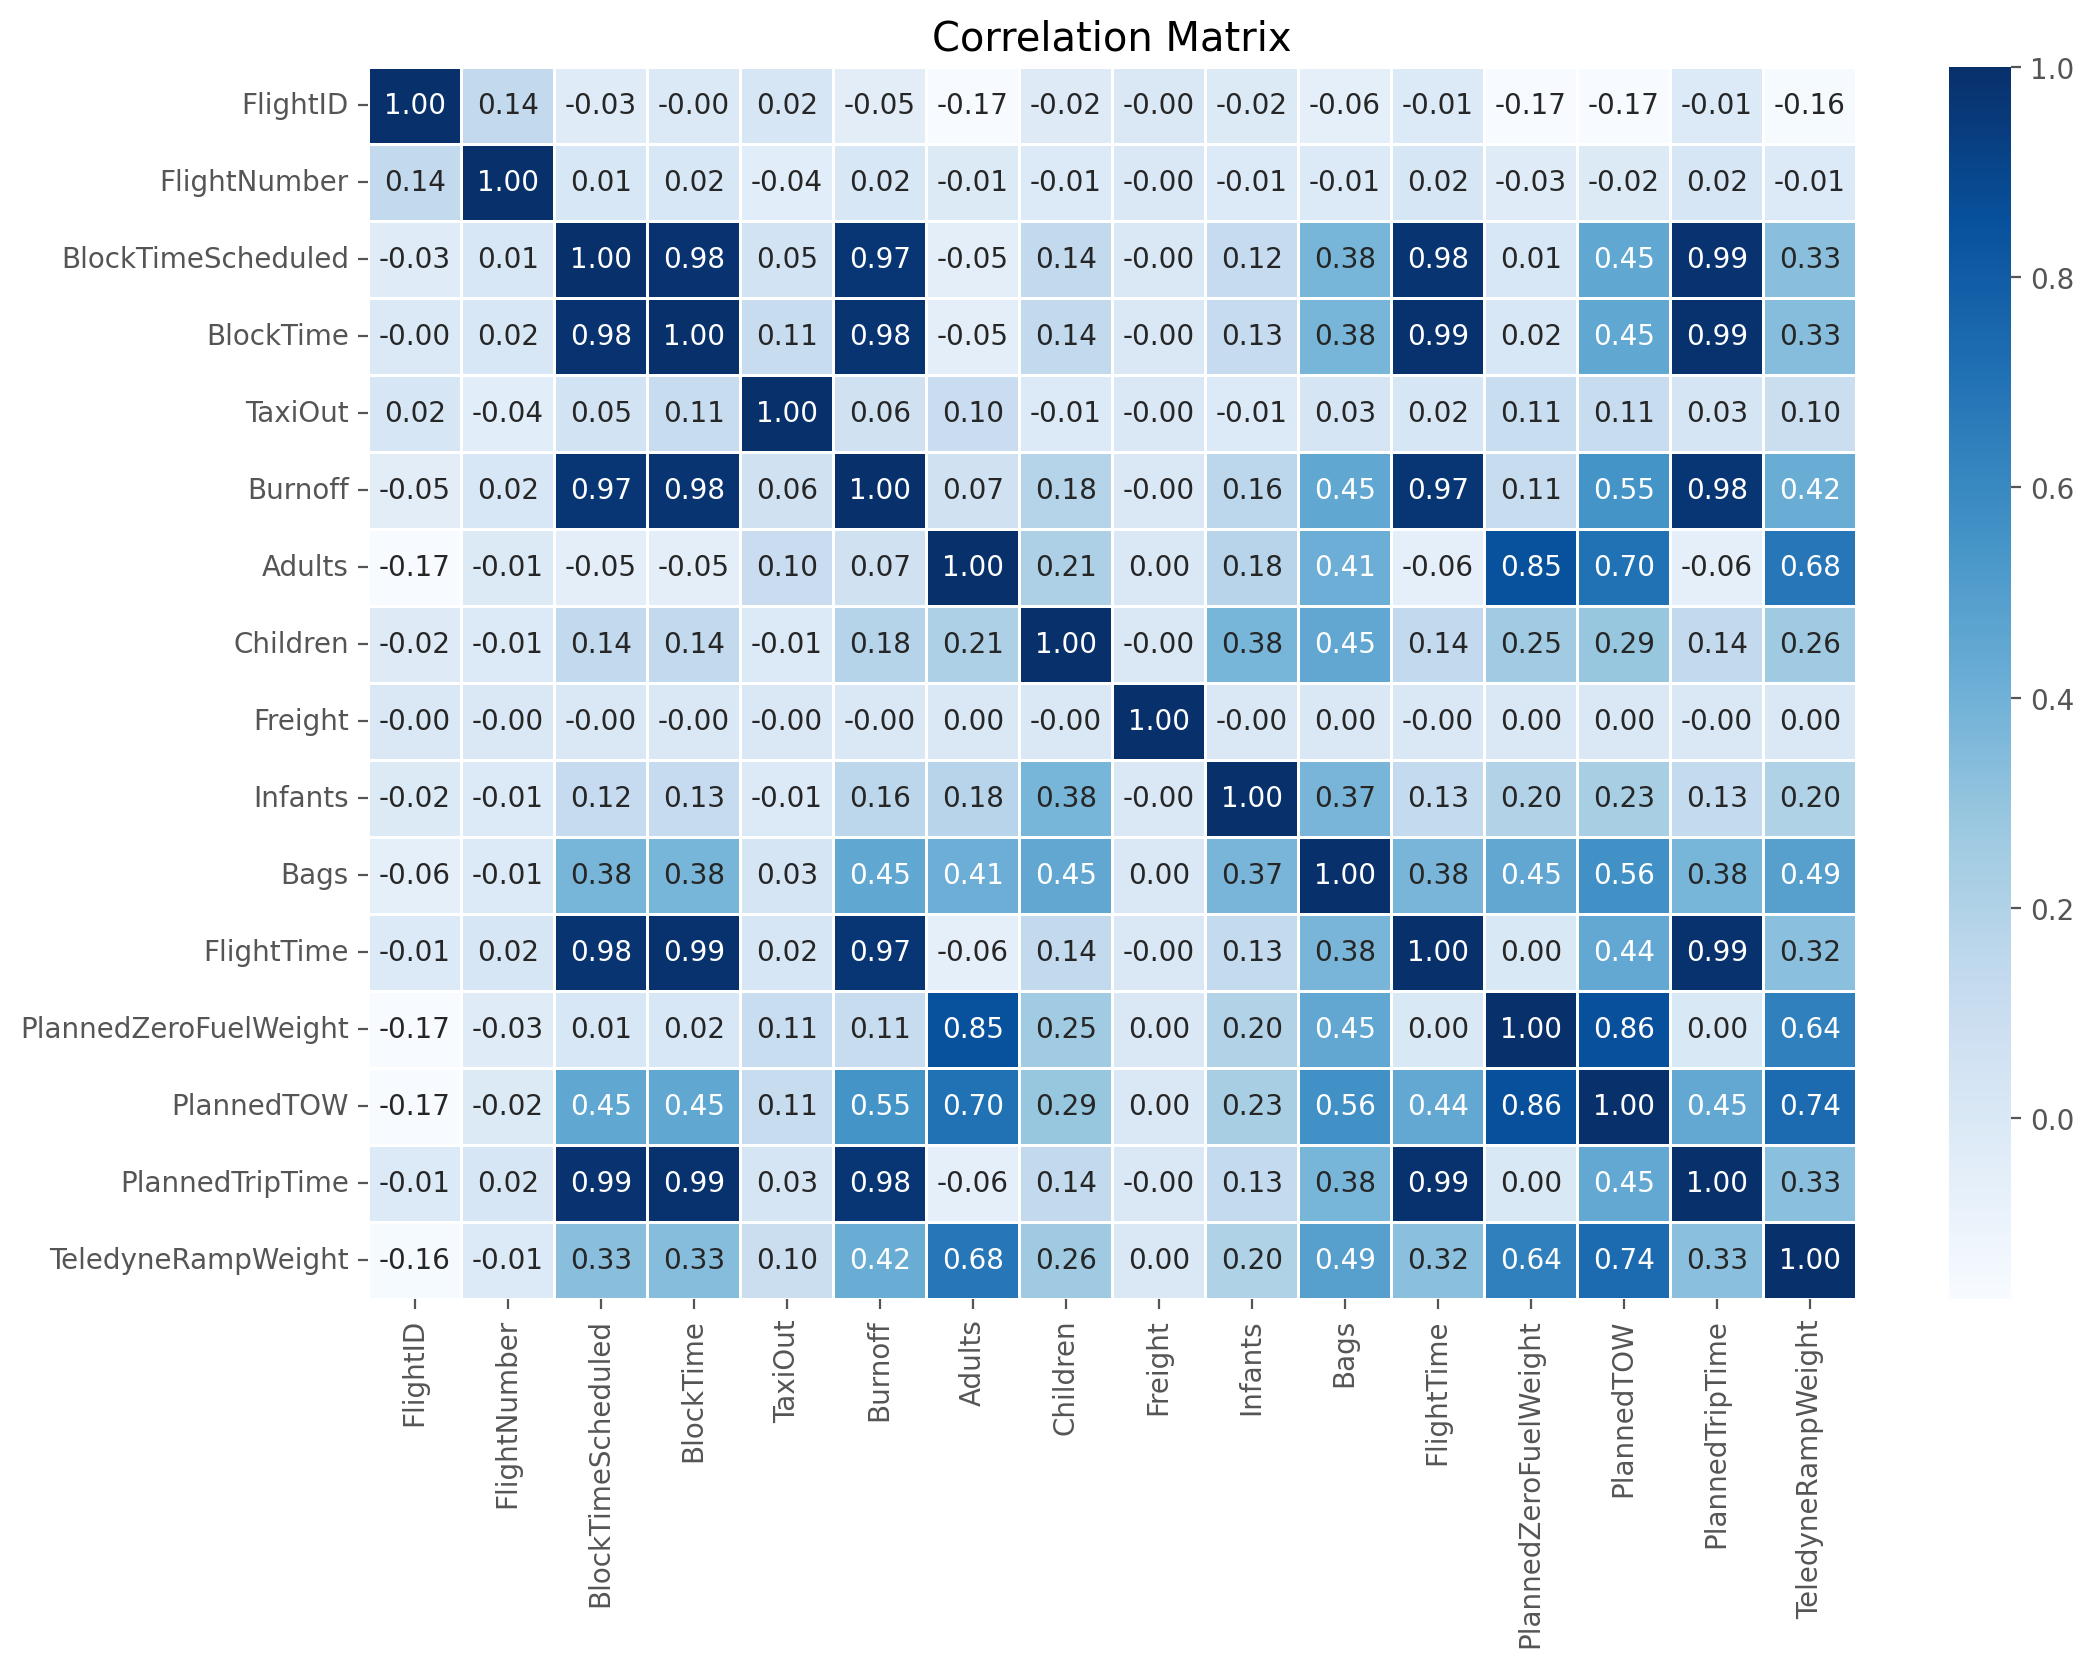

In [ ]:
#correlation matrix
variables = [
    'FlightID', 'FlightNumber', 'BlockTimeScheduled', 'BlockTime', 'TaxiOut', 'Burnoff',
    'Adults', 'Children', 'Freight', 'Infants', 'Bags', 'FlightTime',
    'PlannedZeroFuelWeight', 'PlannedTOW', 'PlannedTripTime', 'TeledyneRampWeight'
]
data_cor = df[variables]
correlation_matrix = data_cor.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The following pairs exhibit a high correlation:
- BlockTime - BlockTime Scheduled (0.98)
- Burnoff - BlockTime Scheduled (0.97)
- Burnoff - BlockTime (0.98)
- FlightTime - BlockTime Scheduled (0.98)
- FlightTime - BlockTime (0.99)
- PlannedTripTime - BlockTime Scheduled (0.99)
- PlannedTripTime - BlockTime (0.99)
- FlightTime - Burnoff (0.97)
- PlannedTripTime - Flight-time (0.99)

##Distribution
Some of the variables are skewed. Therefore, we will plot the distribution, the QQ-plot and the boxplot to see the behavior of the numerical variables.

In [ ]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars

['FlightID',
 'FlightNumber',
 'AircraftCapacity',
 'BlockTimeScheduled',
 'BlockTime',
 'TaxiOut',
 'Burnoff',
 'Adults',
 'Children',
 'Freight',
 'Infants',
 'Bags',
 'FlightTime',
 'PlannedZeroFuelWeight',
 'PlannedTOW',
 'PlannedTripTime',
 'TeledyneRampWeight']

In [ ]:
for feat in num_vars:
    print(feat)
    sns.distplot(df[feat], fit=norm);
    (mu, sigma) = norm.fit(df[feat])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Distribution')

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    res = stats.probplot(df[feat], plot=axs[0])
    axs[1] = plt.boxplot(df[feat])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Outlier Removal

In [ ]:
# Remove negative burnoff
mask_burnoff = df["Burnoff"] > 0
df = df[mask_burnoff]

# Block time too high
mask_block_time = df["BlockTime"] < 500
df = df[mask_block_time]

## Data Study

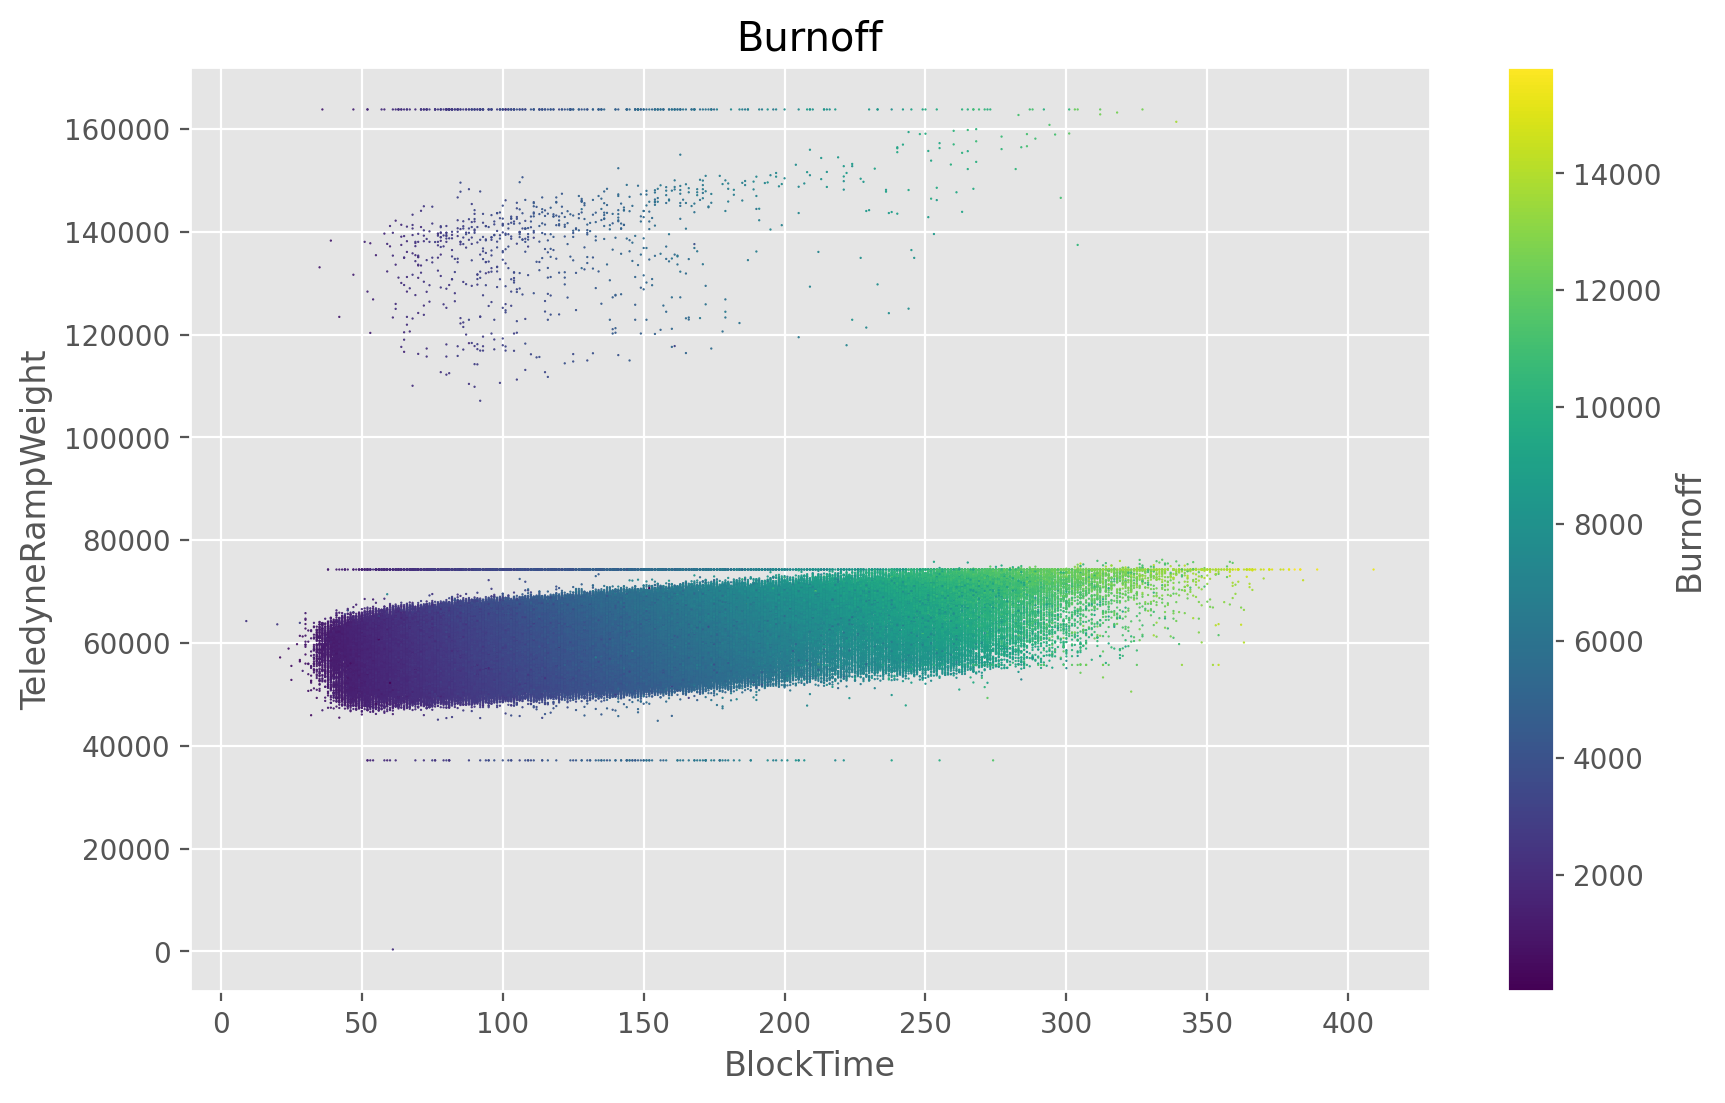

In [ ]:
plt.scatter(df["BlockTime"], df["TeledyneRampWeight"], c=df["Burnoff"], s=.1)
plt.xlabel("BlockTime")
plt.ylabel("TeledyneRampWeight")
plt.title("Burnoff")
plt.colorbar(label="Burnoff")
plt.show()

Outliers suggest that some weights are in pounds:

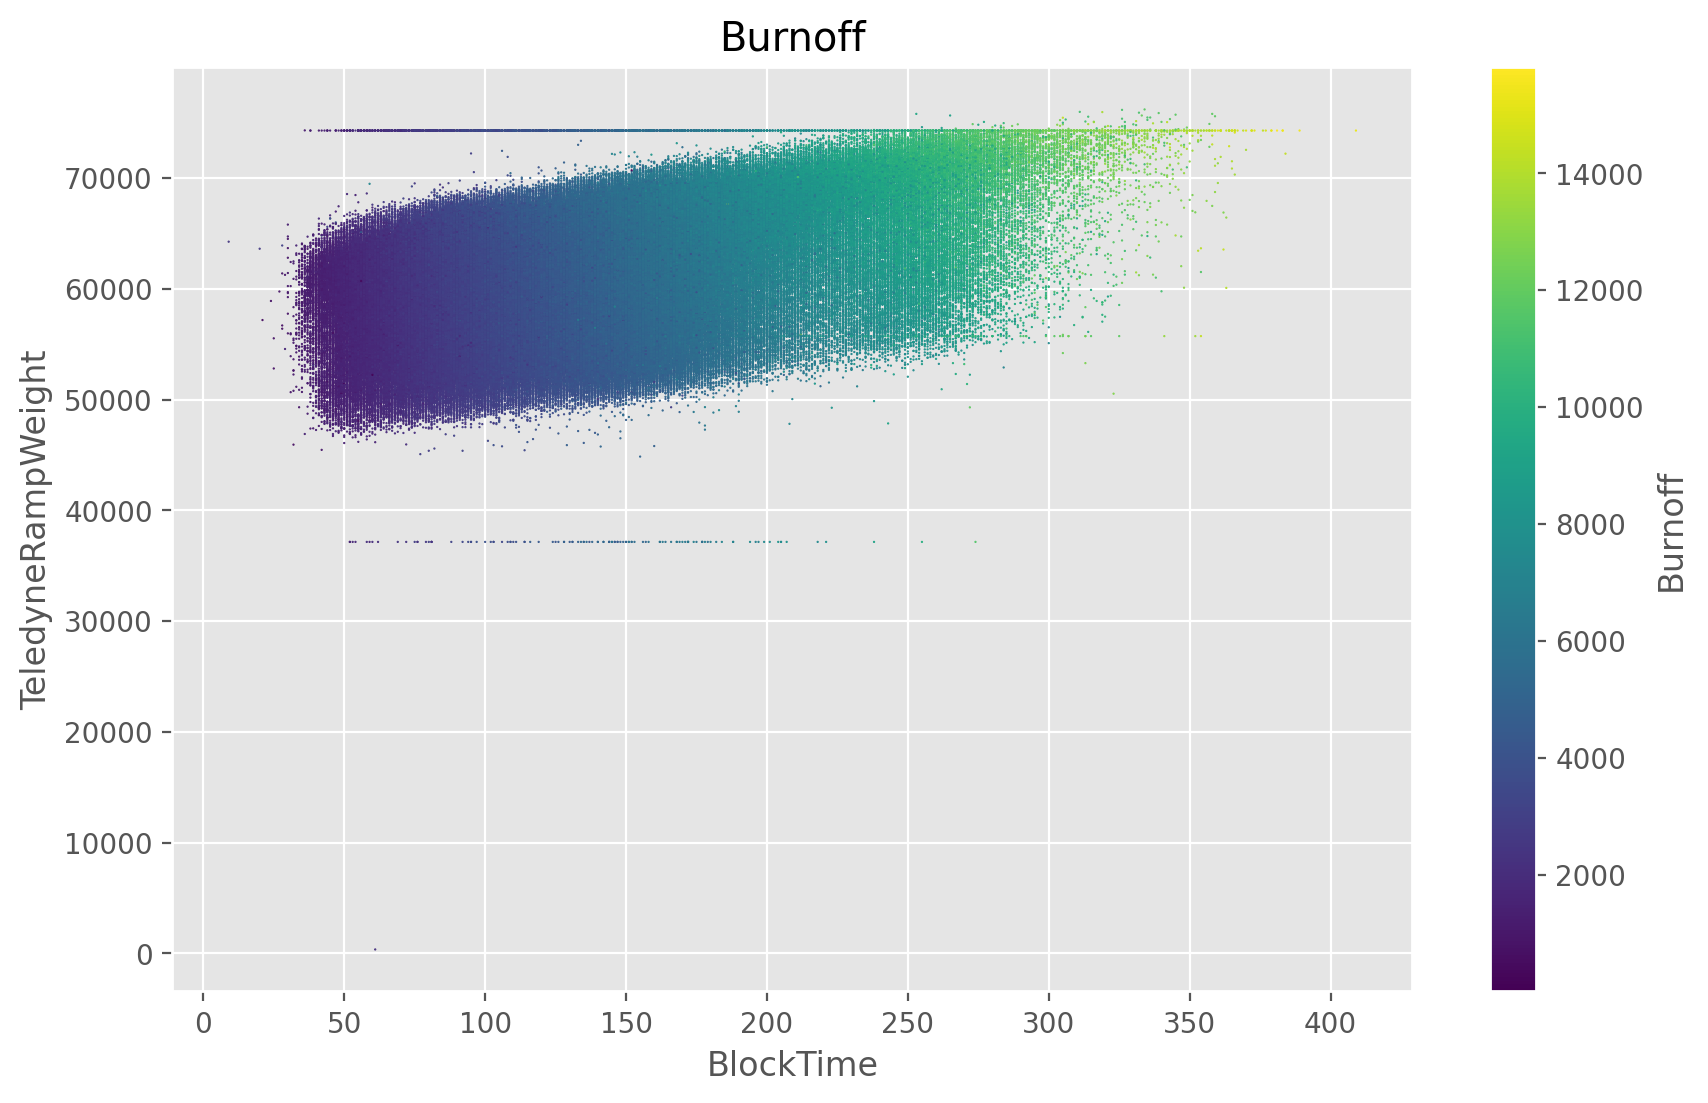

In [ ]:
# Create a new column with the weight in kilograms
df["TeledyneRampWeight"] = df["TeledyneRampWeight"].apply(lambda x: x * 0.453592 if x > 100000 else x).astype(int)

# Scatter plot without outliers
plt.scatter(df["BlockTime"], df["TeledyneRampWeight"], c=df["Burnoff"], s=.1)
plt.xlabel("BlockTime")
plt.ylabel("TeledyneRampWeight")
plt.title("Burnoff")
plt.colorbar(label="Burnoff")
plt.show()

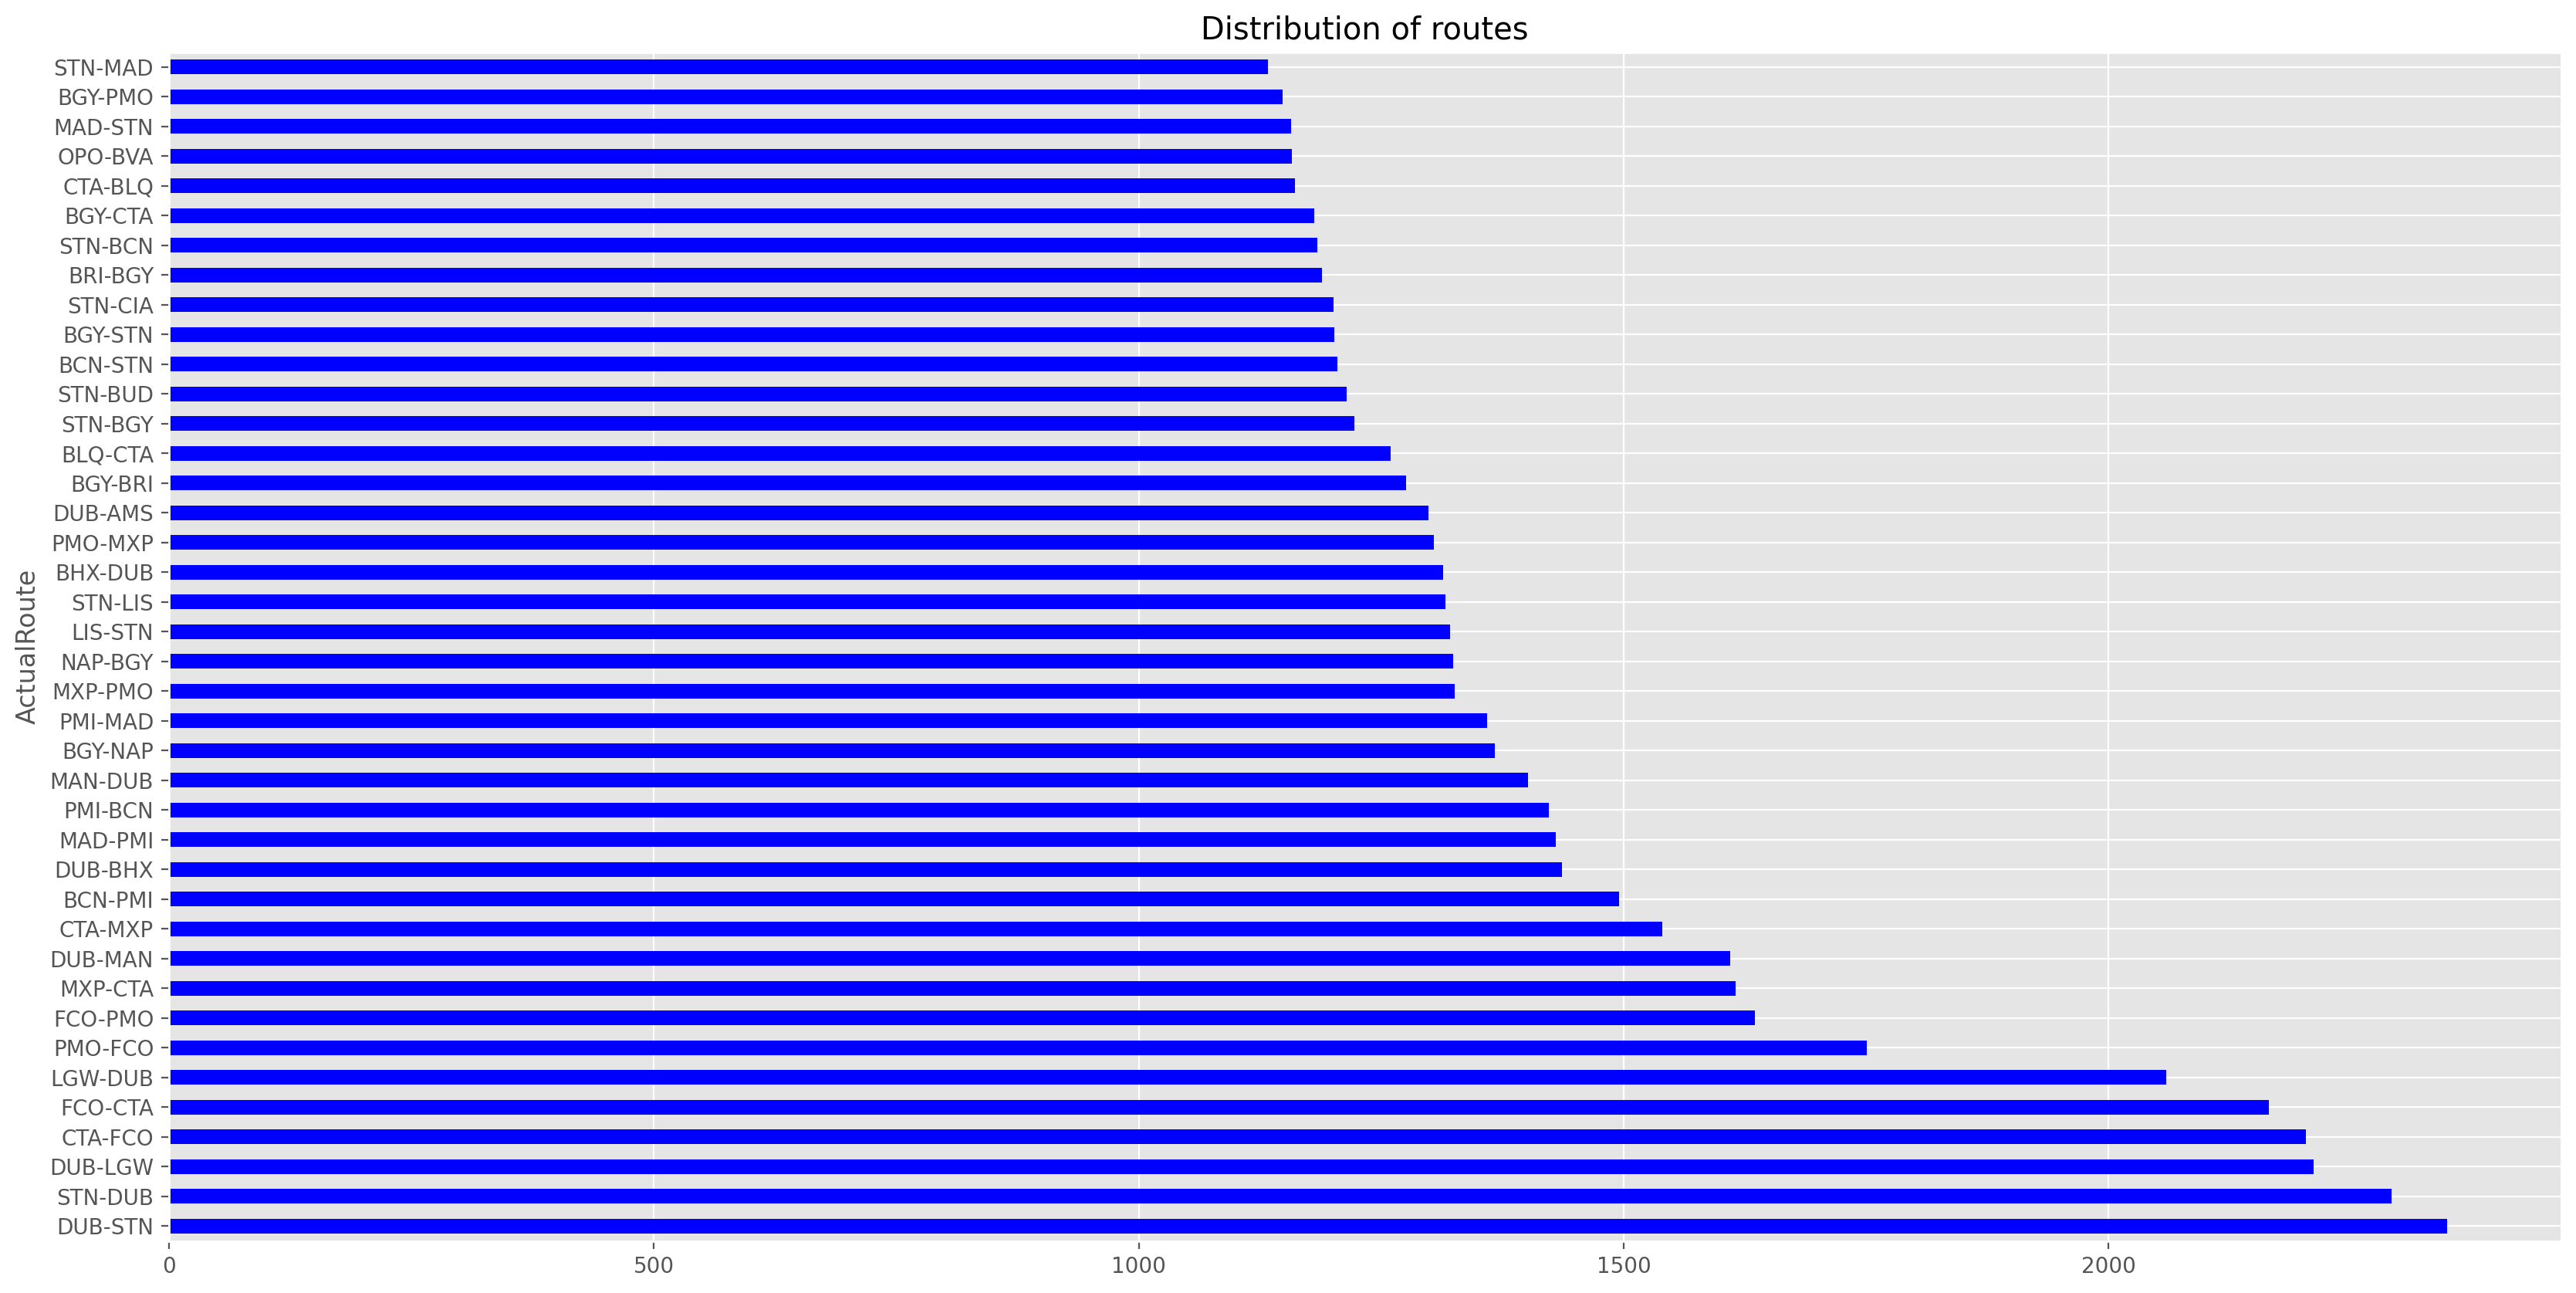

In [ ]:
# Most frequent route
figure, ax = plt.subplots(figsize=(20, 10))
df["ActualRoute"].value_counts().head(40).plot.barh(color='blue')
plt.title("Distribution of routes")
plt.show()

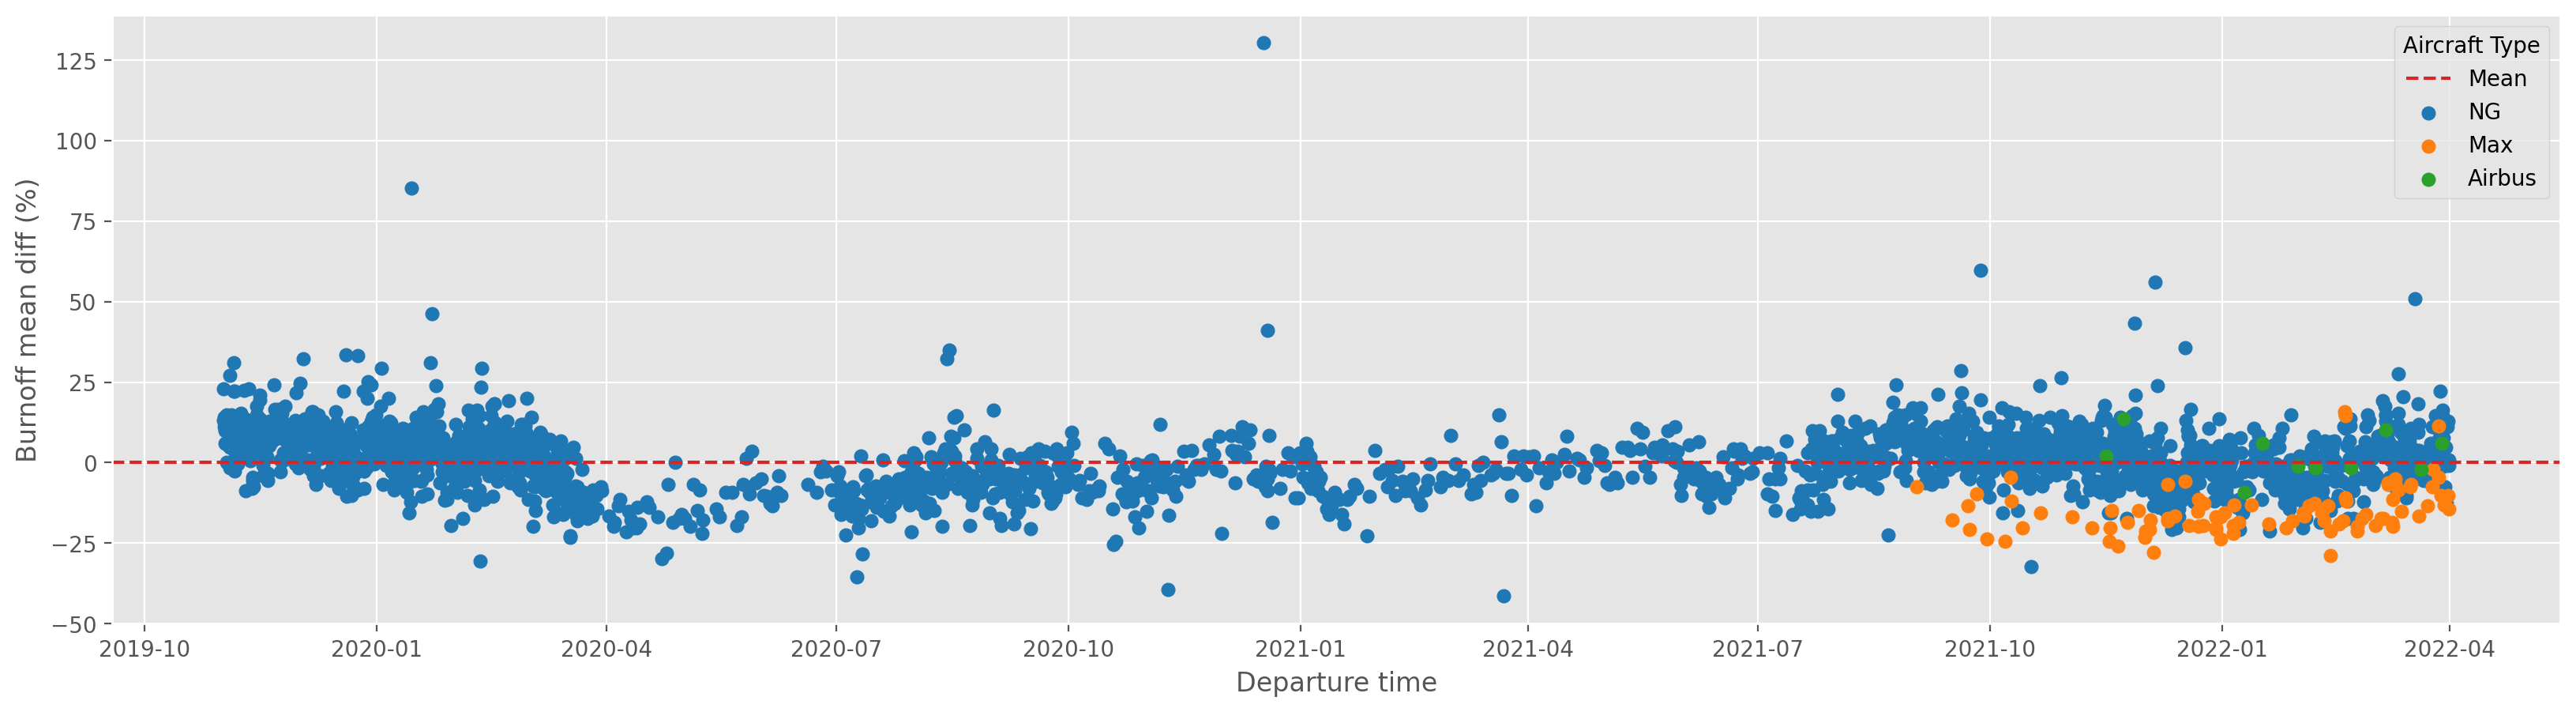

In [ ]:
# Burnoff for most common route (DUB-STN) for different Aircraft Types
dublin_routes = df[df["ActualRoute"] == "DUB-STN"].copy()

# Predefined colors for different aircraft types
colors = ["tab:blue", "tab:orange", "tab:green"]

# Calculate the mean burnoff and the difference in percentage
mean_fuel = dublin_routes["Burnoff"].mean()
dublin_routes["burnoff_mean_diff"] = (
    (dublin_routes["Burnoff"] - mean_fuel) / mean_fuel * 100
)

# Convert departure scheduled to datetime for plotting
dublin_routes["DepartureScheduled"] = pd.to_datetime(
    dublin_routes["DepartureScheduled"]
)

figure, ax1 = plt.subplots(figsize=(20, 5))

# Mean Line
ax1.axhline(0, color="tab:red", linestyle="--", label="Mean")

# Plot the burnoff mean diff for each aircraft type
for air_craft_type, color in zip(dublin_routes["AircraftTypeGroup"].unique(), colors):
    subset = dublin_routes[dublin_routes["AircraftTypeGroup"] == air_craft_type]
    ax1.scatter(
        x=subset["DepartureScheduled"],
        y=subset["burnoff_mean_diff"],
        label=air_craft_type,
        color=color
    )

# Setting labels
ax1.set_xlabel("Departure time")
ax1.set_ylabel("Burnoff mean diff (%)")

# Display the legend
ax1.legend(title="Aircraft Type")

# Display the plot
plt.show()